In [1]:
import numpy as np 
import pandas as pd
import os
from matplotlib import pyplot as plt 
import cv2 as cv

In [9]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [10]:
import torch
torch.cuda.is_available() 
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3070 Laptop GPU'

In [15]:
torch.cuda.empty_cache()

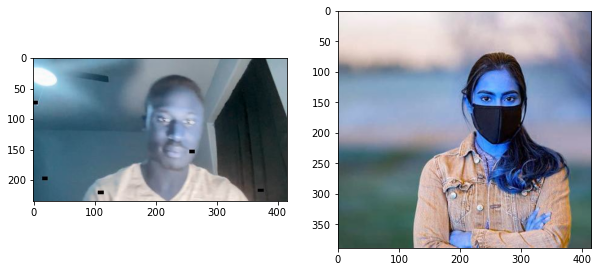

In [2]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
image = cv.imread(r"C:\Users\bertu\Face Detection and Counting\Data\train\images\face-detection_mp4-7_jpg.rf.34868a63b858705c625293579938fda8.jpg")
ax[0].imshow(image)
image = cv.imread(r"C:\Users\bertu\Face Detection and Counting\Data\test\images\download_jpeg_jpg.rf.4ceb708decab8bbb97581afb3bbeef2b.jpg")
ax[1].imshow(image)

## Clone YOLOv7

In [4]:
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

C:\Users\bertu\Face Detection and Counting\yolov7


Cloning into 'yolov7'...


In [2]:
%cd C:\Users\bertu\Face Detection and Counting\yolov7

C:\Users\bertu\Face Detection and Counting\yolov7


In [3]:
pwd

'C:\\Users\\bertu\\Face Detection and Counting\\yolov7'

In [13]:
!more "C:\Users\bertu\Face Detection and Counting\Data\data.yaml"

train: C:\Users\bertu\Face Detection and Counting\Data\train\images
val: C:\Users\bertu\Face Detection and Counting\Data\valid\images

nc: 1
names: ['face']


In [14]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Train

In [15]:
!python train.py --batch 8 --epochs 100 --data "C:\Users\bertu\Face Detection and Counting\Data\data.yaml" --weights "C:\Users\bertu\Face Detection and Counting\yolov7\yolov7.pt" --device 0 

wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)

YOLOR  2022-11-2 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8191.5MB)

Namespace(weights='C:\\Users\\bertu\\Face Detection and Counting\\yolov7\\yolov7.pt', cfg='', data='C:\\Users\\bertu\\Face Detection and Counting\\Data\\data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=100, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs\\train\\exp5', total_batch_size=8)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=



autoanchor: Analyzing anchors... anchors/target = 5.17, Best Possible Recall (BPR) = 0.9986
                 all         258         505       0.569       0.334       0.321      0.0682
                 all         258         505       0.606       0.448       0.438       0.181
                 all         258         505       0.684       0.501       0.556       0.238
                 all         258         505       0.739       0.521       0.557       0.216
                 all         258         505       0.697       0.584       0.619       0.257
                 all         258         505       0.775       0.621        0.66       0.326
                 all         258         505       0.711       0.657       0.675       0.287
                 all         258         505       0.833       0.685       0.744        0.36
                 all         258         505       0.832       0.648       0.734       0.359
                 all         258         505        0.84       0.675 

      0/99      5.9G   0.06837   0.01391         0   0.08228        35       640:  53%|#####3    | 183/344 [01:15<01:00,  2.68it/s]
      0/99      5.9G   0.06838   0.01389         0   0.08227        47       640:  53%|#####3    | 183/344 [01:16<01:00,  2.68it/s]
      0/99      5.9G   0.06838   0.01389         0   0.08227        47       640:  53%|#####3    | 184/344 [01:16<00:59,  2.69it/s]
      0/99      5.9G   0.06836   0.01387         0   0.08223        24       640:  53%|#####3    | 184/344 [01:16<00:59,  2.69it/s]
      0/99      5.9G   0.06836   0.01387         0   0.08223        24       640:  54%|#####3    | 185/344 [01:16<01:00,  2.64it/s]
      0/99      5.9G   0.06834   0.01384         0   0.08219        25       640:  54%|#####3    | 185/344 [01:16<01:00,  2.64it/s]
      0/99      5.9G   0.06834   0.01384         0   0.08219        25       640:  54%|#####4    | 186/344 [01:16<00:58,  2.70it/s]
      0/99      5.9G   0.06833   0.01381         0   0.08214        16      

      1/99     5.92G   0.05375   0.01123         0   0.06498        24       640:  22%|##2       | 77/344 [00:28<01:38,  2.71it/s]
      1/99     5.92G   0.05387   0.01123         0    0.0651        40       640:  22%|##2       | 77/344 [00:28<01:38,  2.71it/s]
      1/99     5.92G   0.05387   0.01123         0    0.0651        40       640:  23%|##2       | 78/344 [00:28<01:37,  2.74it/s]
      1/99     5.92G   0.05397   0.01121         0   0.06518        27       640:  23%|##2       | 78/344 [00:29<01:37,  2.74it/s]
      1/99     5.92G   0.05397   0.01121         0   0.06518        27       640:  23%|##2       | 79/344 [00:29<01:38,  2.69it/s]
      1/99     5.92G   0.05397   0.01118         0   0.06515        18       640:  23%|##2       | 79/344 [00:29<01:38,  2.69it/s]
      1/99     5.92G   0.05397   0.01118         0   0.06515        18       640:  23%|##3       | 80/344 [00:29<01:37,  2.72it/s]
      1/99     5.92G   0.05389   0.01113         0   0.06502        14       640:  

      4/99     5.99G   0.05543   0.01284         0   0.06827        18       640:   3%|2         | 10/344 [00:04<02:07,  2.62it/s]
      4/99     5.99G   0.05543   0.01284         0   0.06827        18       640:   3%|3         | 11/344 [00:04<02:04,  2.67it/s]
      4/99     5.99G    0.0552   0.01285         0   0.06805        41       640:   3%|3         | 11/344 [00:04<02:04,  2.67it/s]
      4/99     5.99G    0.0552   0.01285         0   0.06805        41       640:   3%|3         | 12/344 [00:04<02:04,  2.68it/s]
      4/99     5.99G   0.05506    0.0126         0   0.06766        32       640:   3%|3         | 12/344 [00:04<02:04,  2.68it/s]
      4/99     5.99G   0.05506    0.0126         0   0.06766        32       640:   4%|3         | 13/344 [00:04<02:02,  2.71it/s]
      4/99     5.99G   0.05504   0.01349         0   0.06853        99       640:   4%|3         | 13/344 [00:05<02:02,  2.71it/s]
      4/99     5.99G   0.05504   0.01349         0   0.06853        99       640:  

      6/99     5.99G   0.04904   0.01042         0   0.05946        24       640:  14%|#4        | 49/344 [00:18<01:49,  2.70it/s]
      6/99     5.99G   0.04853   0.01033         0   0.05886        13       640:  14%|#4        | 49/344 [00:18<01:49,  2.70it/s]
      6/99     5.99G   0.04853   0.01033         0   0.05886        13       640:  15%|#4        | 50/344 [00:18<01:47,  2.73it/s]
      6/99     5.99G   0.04865   0.01024         0   0.05888        32       640:  15%|#4        | 50/344 [00:18<01:47,  2.73it/s]
      6/99     5.99G   0.04865   0.01024         0   0.05888        32       640:  15%|#4        | 51/344 [00:18<01:47,  2.73it/s]
      6/99     5.99G   0.04888   0.01016         0   0.05904        20       640:  15%|#4        | 51/344 [00:19<01:47,  2.73it/s]
      6/99     5.99G   0.04888   0.01016         0   0.05904        20       640:  15%|#5        | 52/344 [00:19<01:47,  2.71it/s]
      6/99     5.99G   0.04887   0.01008         0   0.05895        15       640:  

     10/99     5.99G   0.04391  0.008207         0   0.05212        19       640:  57%|#####7    | 197/344 [01:13<00:54,  2.70it/s]
     10/99     5.99G    0.0439  0.008201         0    0.0521        21       640:  57%|#####7    | 197/344 [01:13<00:54,  2.70it/s]
     10/99     5.99G    0.0439  0.008201         0    0.0521        21       640:  58%|#####7    | 198/344 [01:13<00:54,  2.68it/s]
     10/99     5.99G   0.04394  0.008199         0   0.05214        32       640:  58%|#####7    | 198/344 [01:14<00:54,  2.68it/s]
     10/99     5.99G   0.04394  0.008199         0   0.05214        32       640:  58%|#####7    | 199/344 [01:14<00:53,  2.70it/s]
     10/99     5.99G   0.04393  0.008184         0   0.05211        23       640:  58%|#####7    | 199/344 [01:14<00:53,  2.70it/s]
     10/99     5.99G   0.04393  0.008184         0   0.05211        23       640:  58%|#####8    | 200/344 [01:14<00:53,  2.68it/s]
     10/99     5.99G   0.04391  0.008194         0    0.0521        40      

     12/99     5.99G   0.04245  0.008215         0   0.05066        29       640:  75%|#######5  | 259/344 [01:36<00:31,  2.69it/s]
     12/99     5.99G   0.04245  0.008215         0   0.05066        29       640:  76%|#######5  | 260/344 [01:36<00:31,  2.68it/s]
     12/99     5.99G   0.04247  0.008215         0   0.05069        31       640:  76%|#######5  | 260/344 [01:37<00:31,  2.68it/s]
     12/99     5.99G   0.04247  0.008215         0   0.05069        31       640:  76%|#######5  | 261/344 [01:37<00:31,  2.68it/s]
     12/99     5.99G   0.04252  0.008204         0   0.05072        26       640:  76%|#######5  | 261/344 [01:37<00:31,  2.68it/s]
     12/99     5.99G   0.04252  0.008204         0   0.05072        26       640:  76%|#######6  | 262/344 [01:37<00:30,  2.67it/s]
     12/99     5.99G   0.04252  0.008205         0   0.05073        29       640:  76%|#######6  | 262/344 [01:37<00:30,  2.67it/s]
     12/99     5.99G   0.04252  0.008205         0   0.05073        29      

     17/99     5.99G   0.03843  0.007943         0   0.04637        17       640:  40%|###9      | 137/344 [00:51<01:16,  2.70it/s]
     17/99     5.99G   0.03843  0.007943         0   0.04637        17       640:  40%|####      | 138/344 [00:51<01:16,  2.71it/s]
     17/99     5.99G   0.03829  0.007916         0    0.0462        12       640:  40%|####      | 138/344 [00:51<01:16,  2.71it/s]
     17/99     5.99G   0.03829  0.007916         0    0.0462        12       640:  40%|####      | 139/344 [00:51<01:14,  2.74it/s]
     17/99     5.99G   0.03829  0.007911         0   0.04621        31       640:  40%|####      | 139/344 [00:51<01:14,  2.74it/s]
     17/99     5.99G   0.03829  0.007911         0   0.04621        31       640:  41%|####      | 140/344 [00:51<01:14,  2.74it/s]
     17/99     5.99G   0.03831  0.007898         0   0.04621        25       640:  41%|####      | 140/344 [00:52<01:14,  2.74it/s]
     17/99     5.99G   0.03831  0.007898         0   0.04621        25      

     19/99     5.99G   0.03846  0.007421         0   0.04589        41       640:  51%|#####1    | 176/344 [01:05<01:01,  2.74it/s]
     19/99     5.99G   0.03843  0.007405         0   0.04584        21       640:  51%|#####1    | 176/344 [01:05<01:01,  2.74it/s]
     19/99     5.99G   0.03843  0.007405         0   0.04584        21       640:  51%|#####1    | 177/344 [01:05<01:02,  2.66it/s]
     19/99     5.99G   0.03843  0.007398         0   0.04583        24       640:  51%|#####1    | 177/344 [01:05<01:02,  2.66it/s]
     19/99     5.99G   0.03843  0.007398         0   0.04583        24       640:  52%|#####1    | 178/344 [01:05<01:01,  2.70it/s]
     19/99     5.99G   0.03842  0.007385         0    0.0458        19       640:  52%|#####1    | 178/344 [01:06<01:01,  2.70it/s]
     19/99     5.99G   0.03842  0.007385         0    0.0458        19       640:  52%|#####2    | 179/344 [01:06<01:00,  2.71it/s]
     19/99     5.99G   0.03842   0.00739         0   0.04581        27      

     24/99     5.99G   0.03486   0.00738         0   0.04224        70       640:  43%|####3     | 148/344 [00:55<01:12,  2.71it/s]
     24/99     5.99G   0.03486   0.00738         0   0.04224        70       640:  43%|####3     | 149/344 [00:55<01:12,  2.69it/s]
     24/99     5.99G   0.03486  0.007369         0   0.04223        24       640:  43%|####3     | 149/344 [00:55<01:12,  2.69it/s]
     24/99     5.99G   0.03486  0.007369         0   0.04223        24       640:  44%|####3     | 150/344 [00:55<01:11,  2.73it/s]
     24/99     5.99G   0.03486  0.007381         0   0.04224        39       640:  44%|####3     | 150/344 [00:55<01:11,  2.73it/s]
     24/99     5.99G   0.03486  0.007381         0   0.04224        39       640:  44%|####3     | 151/344 [00:55<01:10,  2.72it/s]
     24/99     5.99G   0.03487  0.007447         0   0.04232        81       640:  44%|####3     | 151/344 [00:56<01:10,  2.72it/s]
     24/99     5.99G   0.03487  0.007447         0   0.04232        81      

     26/99     5.99G    0.0341  0.007153         0   0.04125        23       640:  54%|#####4    | 187/344 [01:09<00:58,  2.70it/s]
     26/99     5.99G   0.03401  0.007132         0   0.04115         9       640:  54%|#####4    | 187/344 [01:09<00:58,  2.70it/s]
     26/99     5.99G   0.03401  0.007132         0   0.04115         9       640:  55%|#####4    | 188/344 [01:09<00:56,  2.76it/s]
     26/99     5.99G   0.03405  0.007116         0   0.04116        22       640:  55%|#####4    | 188/344 [01:10<00:56,  2.76it/s]
     26/99     5.99G   0.03405  0.007116         0   0.04116        22       640:  55%|#####4    | 189/344 [01:10<00:55,  2.77it/s]
     26/99     5.99G   0.03407  0.007102         0   0.04117        23       640:  55%|#####4    | 189/344 [01:10<00:55,  2.77it/s]
     26/99     5.99G   0.03407  0.007102         0   0.04117        23       640:  55%|#####5    | 190/344 [01:10<00:55,  2.79it/s]
     26/99     5.99G   0.03411  0.007095         0    0.0412        27      

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



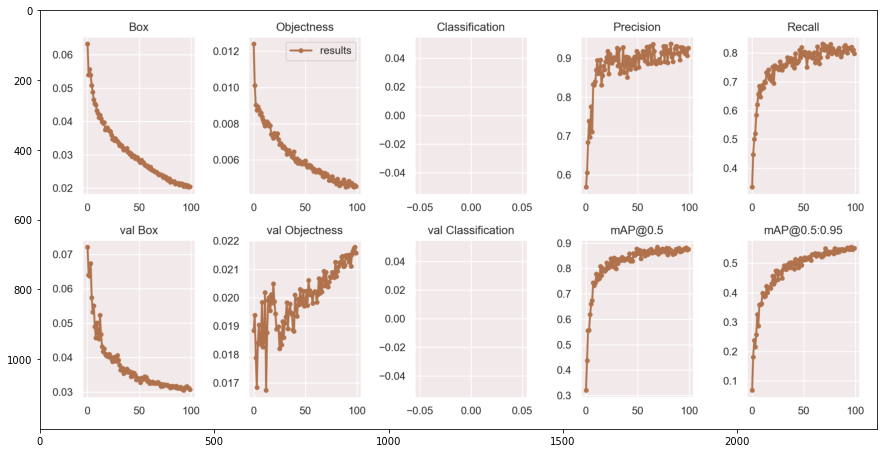

In [17]:
img = cv.imread(r"C:\Users\bertu\Face Detection and Counting\yolov7\runs\train\exp5\results.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)

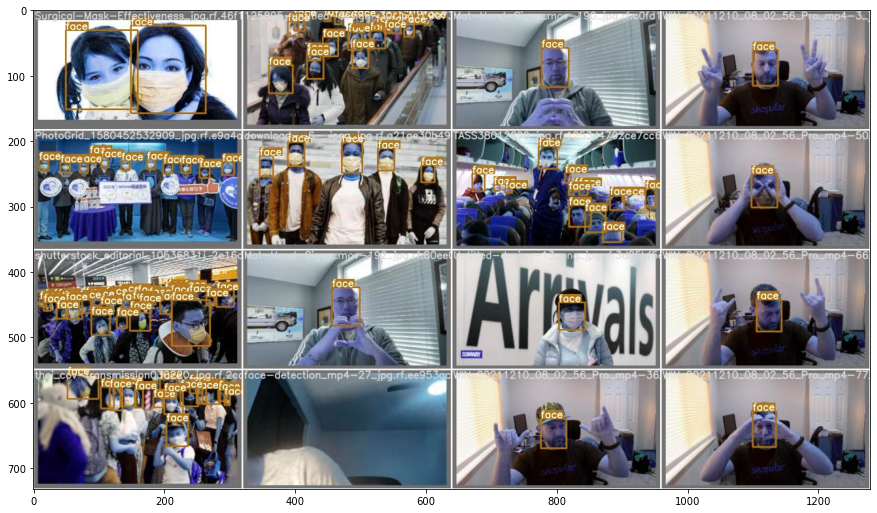

In [19]:
img = cv.imread(r"C:\Users\bertu\Face Detection and Counting\yolov7\runs\train\exp5\test_batch0_labels.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

## Detect

In [ ]:
!python detect.py --source 0 --weights "C:\Users\bertu\Face Detection and Counting\yolov7\runs\train\exp5\weights\best.pt"

In [7]:
!python detect_and_count.py --weights "C:\Users\bertu\Face Detection and Counting\yolov7\runs\train\exp5\weights\best.pt" --conf 0.1 --source "C:\Users\bertu\Face Detection and Counting\Data\test\images\Stokoe20-58-scaled-1_jpg.rf.4a3866396509fd59137030893589a039.jpg"
    

Namespace(weights=['C:\\Users\\bertu\\Face Detection and Counting\\yolov7\\runs\\train\\exp5\\weights\\best.pt'], source='C:\\Users\\bertu\\Face Detection and Counting\\Data\\test\\images\\Stokoe20-58-scaled-1_jpg.rf.4a3866396509fd59137030893589a039.jpg', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

6 faces, Done. (16.0ms) Inference, (29.4ms) NMS
 The image with the result is saved in: runs\detect\exp6\Stokoe20-58-scaled-1_jpg.rf.4a3866396509fd59137030893589a039.jpg
Done. (0.084s)


YOLOR  2022-11-2 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8191.5MB)

Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS


In [ ]:
!python detect_and_count.py --weights "C:\Users\bertu\Face Detection and Counting\yolov7\runs\train\exp5\weights\best.pt" --conf 0.1 --source 0